In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/Leejunho123/5G_project.git
%cd 5G_project/DeepLearning/



Cloning into '5G_project'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 11114 (delta 58), reused 48 (delta 28), pack-reused 11028
Receiving objects: 100% (11114/11114), 245.91 MiB | 30.90 MiB/s, done.
Resolving deltas: 100% (2596/2596), done.
Checking out files: 100% (243/243), done.
/content/5G_project/DeepLearning


## 26 계산 그래프 시각화(2)

### 26.1 시각화 코드 예
+ dezero 에 untils.py 구현

+ 먼저 코드

In [ ]:
import numpy as np
from dezero import Variable
#from dezero.utils import get_dot_graph

x0 = Variable(np.array(1.0))
x1 = Variable(np.array(1.0))
y = x0 + x1

x0.name = 'x0'
x1.name = 'x1'
y.name = 'y'

#txt = get_dot_graph(y, verbose=False)
#print(txt)

#with open('/content/drive/MyDrive/밑바닥부터 시작하는 딥러닝3/step26/sample.dot', 'w') as o:
#  o.write(txt)

### 26.2 계산 그래프에서 DOT 언어로 변환하기

In [ ]:
def _dot_var(v, verbose=False):
  dot_var = '{} [label={}, color=orange, style=filled]\n'
  name = '' if v.name is None else v.name
  if verbose and v.data is not None :
    if v.name is not None:
      name += ': '
    name += str(v.shape) + ' ' + str(v.dtype)
  return dot_var.format(id(v),name)

+ dot 언어로 작성된 문자열로 변환

In [ ]:
x = Variable(np.random.randn(2,3))
x.name = 'x'
print(_dot_var(x))
print(_dot_var(x, verbose=True))

140430652236880 [label=x, color=orange, style=filled]

140430652236880 [label=x: (2, 3) float64, color=orange, style=filled]



In [ ]:
def _dot_func(f):
  dot_func = '{} [label={}, color=lightblue, style=filled, shape=box]\n'
  txt = dot_func.format(id(f), f.__class__.__name__)

  dot_edge = '{} -> {}\n'
  for x in f.inputs:
    txt += dot_edge.format(id(x), id(f))
  for y in f.outputs:
    txt += dot_edge.format(id(f), id(y()))
  return txt

In [ ]:
x0 = Variable(np.array(1.0))
x1 = Variable(np.array(1.0))
y = x0 + x1
txt = _dot_func(y.creator)
print(txt)

140430637139984 [label=Add, color=lightblue, style=filled, shape=box]
140430637139728 -> 140430637139984
140430637139856 -> 140430637139984
140430637139984 -> 140430637139920



In [ ]:
def get_dot_graph(output, verbose= True):
  txt = ''
  funcs = []
  seen_set = set()

  def add_func(f):
    if f not in seen_set:
      funcs.append(f)

      seen_set.add(f)

  add_func(output.creator)
  txt += _dot_var(output, verbose)

  while funcs:
    func = funcs.pop()
    txt += _dot_func(func)
    for x in func.inputs:
      txt += _dot_var(x, verbose)

      if x.creator is not None:
        add_func(x.creator)

  return 'digrah g {\n' + txt + '}'

### 26.3 이미지 변환까지 한 번에

In [ ]:
import os
import subprocess

def plot_dot_graph(output, verbose=True, to_file='graph.png'):
  dot_graph = get_dot_graph(output, verbose)

  # dot 데이터를 파일에 저장
  tmp_dir = os.path.join(os.path.expanduser('~'), '.dezero')
  if not os.path.exists(tmp_dir):
    os.mkdir(tmp_dir)

  graph_path = os.path.join(tmp_dir, 'tmp_graph.dot')

  with open(graph_path, 'w') as f:
    f.write(dot_graph)

  # dot 명령 호출
  extension = os.path.splitext(to_file)[1][1:]
  cmd = 'dot {} -T {} -o {}'.format(graph_path, extension, to_file)
  subprocess.run(cmd, shell=True)

+ 모두 utils 에 넣기

### 26.4 동작 확인

In [3]:
import numpy as np
from dezero import Variable
from dezero.utils import plot_dot_graph, get_dot_graph
import os
import subprocess

In [4]:
def goldstein(x, y):
  z = (1 + (x + y + 1)**2 * (19 - 14*x + 3*x**2 - 14*y + 6*x*y + 3*y**2)) * (30 + (2*x - 3*y)**2 * (18 - 32*x + 12*x**2 + 48*y - 36*x*y + 27*y**2))
  return z


In [5]:
x = Variable(np.array(1.0))
y = Variable(np.array(1.0))
z = goldstein(x,y)
z.backward()

x.name = 'x'
y.name = 'y'
z.name = 'z'

plot_dot_graph(z, verbose=False, to_file='goldstein.png')

In [6]:
txt = get_dot_graph(z, verbose=False)
print(txt)

digraph g {
139713196708112 [label=z, color=orange, style=filled]
139713196695504 [label=Mul, color=lightblue, style=filled, shape=box]
139713196692624 -> 139713196695504
139713196707984 -> 139713196695504
139713196695504 -> 139713196708112
139713196692624 [label=none, color=orange, style=filled]
139713196707984 [label=none, color=orange, style=filled]
139713196695376 [label=Add, color=lightblue, style=filled, shape=box]
139713196695440 -> 139713196695376
139713196707920 -> 139713196695376
139713196695376 -> 139713196707984
139713196695440 [label=none, color=orange, style=filled]
139713196707920 [label=none, color=orange, style=filled]
139713196695248 [label=Mul, color=lightblue, style=filled, shape=box]
139713196693264 -> 139713196695248
139713196695312 -> 139713196695248
139713196695248 -> 139713196695440
139713196693264 [label=none, color=orange, style=filled]
139713196695312 [label=none, color=orange, style=filled]
139713196695056 [label=Add, color=lightblue, style=filled, shape=bo

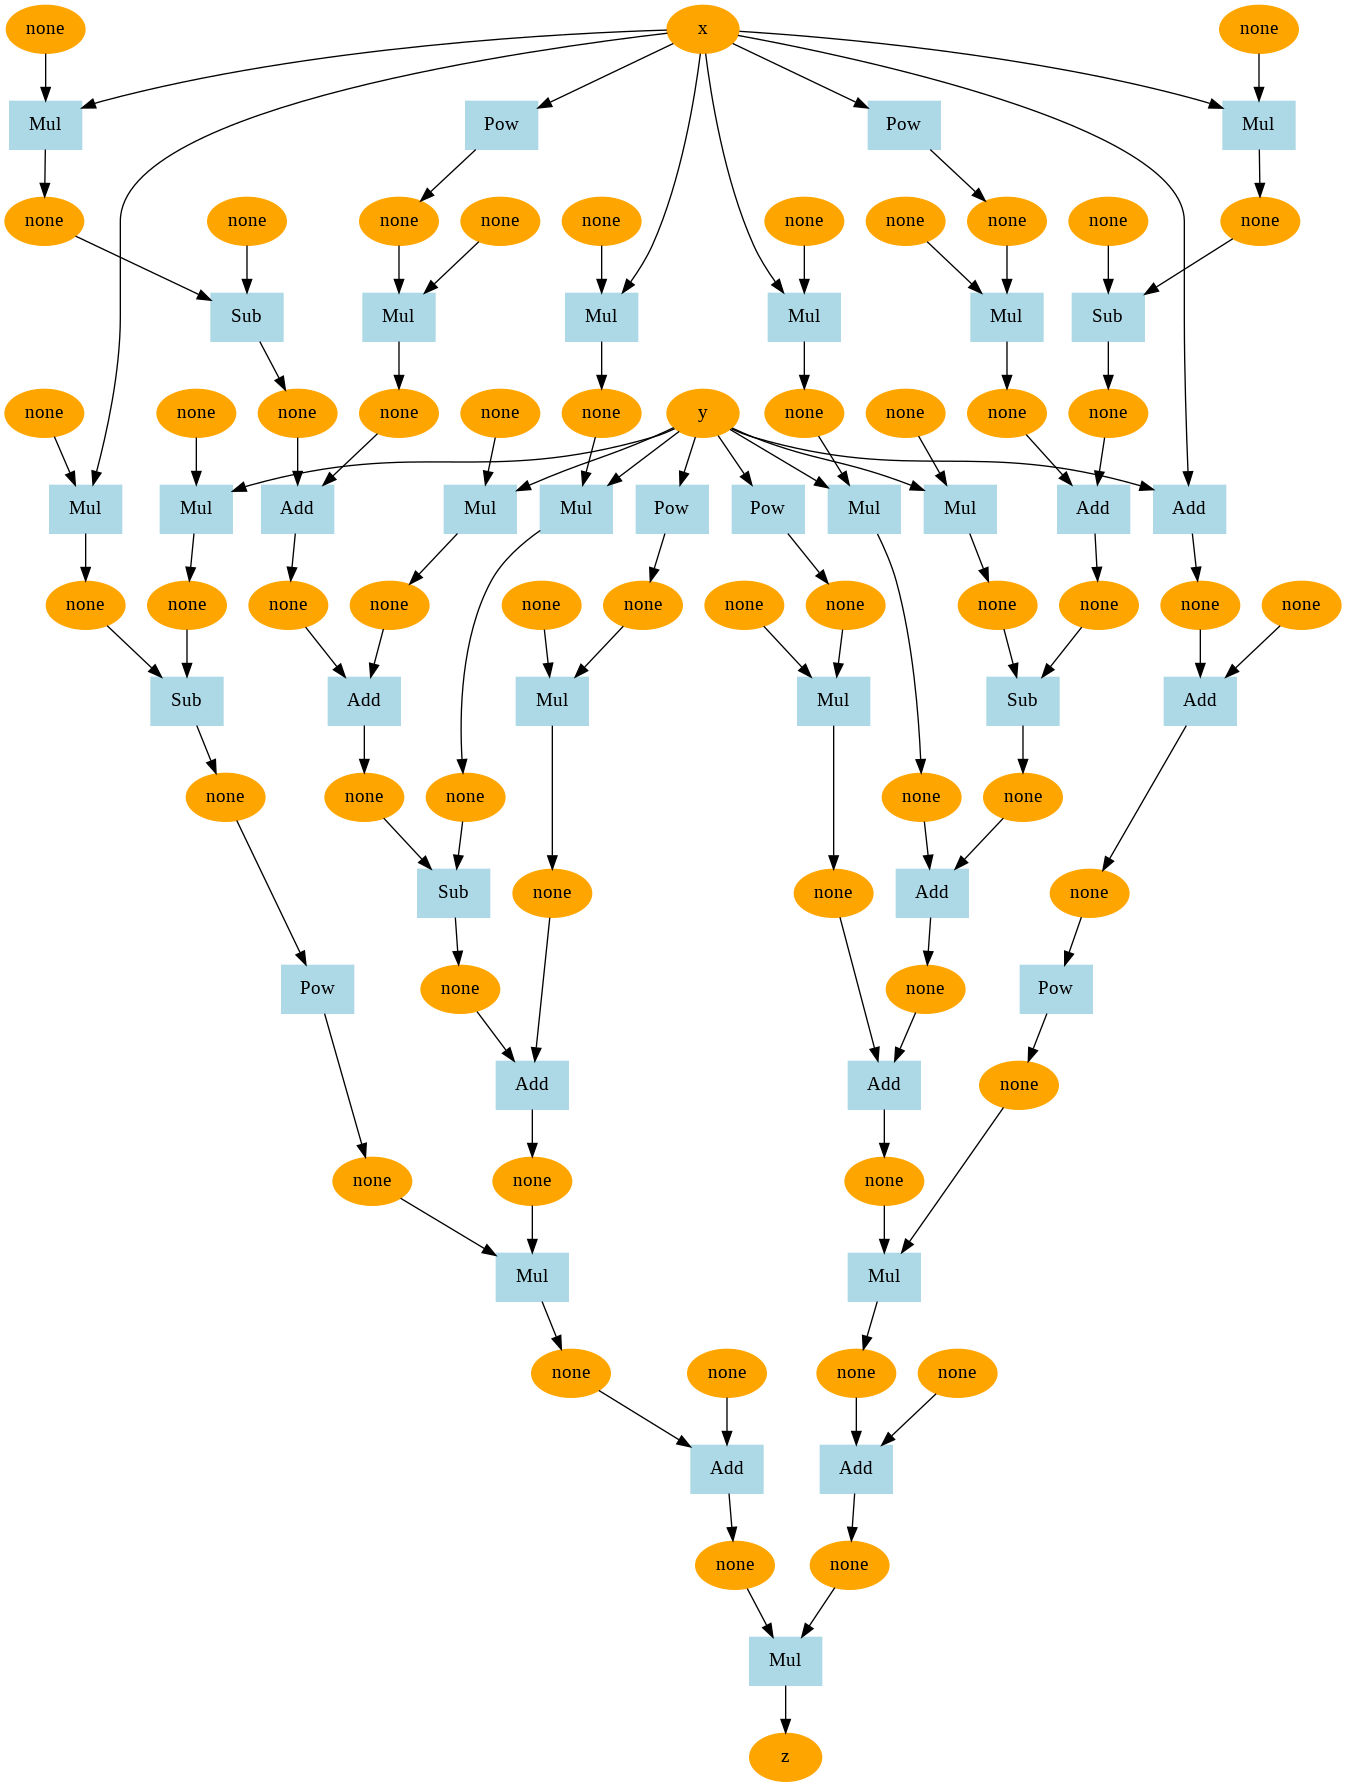